# Introduction to NLP Annotation Pipelines in R

## Douglas Rice

*This tutorial was originally created by Burt Monroe for his prior work with the Essex Summer School. I've updated and modified it.*

In this notebook, we'll learn about doing NLP tasks in R, including tokenization, stemming, part-of-speech tagging, named entity recognition, and dependency parsing. After completing this notebook, you should be familar with:

1. Tokenization
2. Stemming & Lemmatization
3. Part-of-Speech Tagging
4. Named Entity Recognition
5. Dependency Parsing

# Annotation Pipelines

NLP tasks are typically organized around the concept of an annotation "pipeline" based on a given "language model." Basically, you download/install/load a given model, then pass the model and your input text to the software's annotation pipeline and receive an output object with annotated text.

For example, the pipeline for Stanford CoreNLP is depicted below. The text is first tokenized, then split into sentences, then tokens are tagged with respect to parts of speech, then the tokens are lemmatized, then the named entity recognizer is applied, and finally the dependency parser is applied. The output is an object from which all of those annotations can be accessed.

![CoreNLP Pipeline (Source: https://stanfordnlp.github.io/CoreNLP/index.html)](https://stanfordnlp.github.io/CoreNLP/assets/images/pipeline.png)

There are, of course, many packages to for NLP in R. We're going to focus on the workhorses, but that isn't to say there aren't other options.

Practical note: many of these packages contain functions with the same name, so loading order will affect which libraries' commands mask the others'. I have tried to avoid this issue here by explicit use of namespaces, e.g. "quanteda::dfm()". This will often not be necessary when using a particular package in relative isolation.

# Installations



### Installations needed for quanteda section

In [ ]:
install.packages("quanteda")

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòISOcodes‚Äô, ‚Äòfastmatch‚Äô, ‚ÄòRcppParallel‚Äô, ‚ÄòSnowballC‚Äô, ‚Äòstopwords‚Äô, ‚ÄòRcppArmadillo‚Äô




In [ ]:
#install.packages("devtools")
library(devtools)
devtools::install_github("quanteda/quanteda.corpora")
library("quanteda.corpora")
devtools::install_github("quanteda/quanteda.textmodels") 

In [ ]:
install.packages("tokenizers")

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)



### Installations needed for tm section

In [ ]:
install.packages("tm")

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòNLP‚Äô, ‚Äòslam‚Äô, ‚ÄòBH‚Äô




### Installations needed for tidytext section

In [ ]:
#install.packages("tidyverse") # or just install dplyr, stringr, and magrittr
install.packages("dplyr")
install.packages("stringr")
install.packages("magrittr")
install.packages("tidytext")

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)



# Text-as-data frameworks/ecosystems

Quanteda, tm, and tidytext are general -- partially overlapping, interrelated, and interconnected -- frameworks for text-as-data analysis, and most social scientific text work in R is managed through one of these. They provide direct access to a varying, but relatively limited, set of tools for NLP per se (things like tokenization, stopword removal, case-folding, and stemming). Their primary strengths are in the data science aspects of managing/wrangling text data as quantitative data for statistical / machine learning analysis.



## quanteda

Quanteda is a very general ecosystem for text analysis in R. There is a more extensive tutorial on quanteda here: XX.

In [ ]:
library(quanteda)

Package version: 3.1.0
Unicode version: 10.0
ICU version: 60.2

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.



There are a number of sample corpora provided by Quanteda in the "quanteda.corpora" and "quanteda.textmodels" packages, which must be installed from Github via the package "devtools." Note that to properly install quanteda.textmodels without errors on RStudio Cloud, I had to increase allocated RAM to 2GB.


In [ ]:
library("quanteda.corpora")

For this demonstration, we will use the movie review dataset provided in quanteda.textmodels (a sample of 2000 movie reviews, classified as positive or negative, from Pang and Lee (2004)).

In [ ]:
library("quanteda.textmodels")
movie_corpus <- quanteda.textmodels::data_corpus_moviereviews

The basics of a Quanteda corpus can be accessed through the `summary` command.

In [ ]:
summary(movie_corpus)

Text            Types Tokens Sentences sentiment id1   id2  
1   cv000_29416.txt 354    841    9        neg       cv000 29416
2   cv001_19502.txt 156    278    1        neg       cv001 19502
3   cv002_17424.txt 276    553    3        neg       cv002 17424
4   cv003_12683.txt 313    555    2        neg       cv003 12683
5   cv004_12641.txt 380    841    2        neg       cv004 12641
6   cv005_29357.txt 328    747    1        neg       cv005 29357
7   cv006_17022.txt 331    641    5        neg       cv006 17022
8   cv007_4992.txt  325    673    6        neg       cv007 4992 
9   cv008_29326.txt 441    794   10        neg       cv008 29326
10  cv009_29417.txt 401    965   23        neg       cv009 29417
11  cv010_29063.txt 430    834    3        neg       cv010 29063
12  cv011_13044.txt 307    590    2        neg       cv011 13044
13  cv012_29411.txt 286    523    2        neg       cv012 29411
14  cv013_10494.txt 437   1106    2        neg       cv013 10494
15  cv014_15600.txt 275    596    4        neg       cv014 15600
16  cv015_29356.txt 357    776    3        neg       cv015 29356
17  cv016_4348.txt  332    720    4        neg       cv016 4348 
18  cv017_23487.txt 366    800   11        neg       cv017 23487
19  cv018_21672.txt 249    504    5        neg       cv018 21672
20  cv019_16117.txt 326    845    5        neg       cv019 16117
21  cv020_9234.txt  401    799    4        neg       cv020 9234 
22  cv021_17313.txt 355    599    9        neg       cv021 17313
23  cv022_14227.txt 309    757    2        neg       cv022 14227
24  cv023_13847.txt 450   1223    2        neg       cv023 13847
25  cv024_7033.txt  404    770    3        neg       cv024 7033 
26  cv025_29825.txt 323    638    2        neg       cv025 29825
27  cv026_29229.txt 300    566    3        neg       cv026 29229
28  cv027_26270.txt 643   1442    5        neg       cv027 26270
29  cv028_26964.txt 324    607    4        neg       cv028 26964
30  cv029_19943.txt 193    363    3        neg       cv029 19943
‚ãÆ   ‚ãÆ               ‚ãÆ     ‚ãÆ      ‚ãÆ         ‚ãÆ         ‚ãÆ     ‚ãÆ    
71  cv070_13249.txt 481    997    8        neg       cv070 13249
72  cv071_12969.txt 358    836    2        neg       cv071 12969
73  cv072_5928.txt  411    831    3        neg       cv072 5928 
74  cv073_23039.txt 379    748    4        neg       cv073 23039
75  cv074_7188.txt  295    579    5        neg       cv074 7188 
76  cv075_6250.txt  202    386    1        neg       cv075 6250 
77  cv076_26009.txt 212    358    1        neg       cv076 26009
78  cv077_23172.txt 347    739    4        neg       cv077 23172
79  cv078_16506.txt 342    704    2        neg       cv078 16506
80  cv079_12766.txt 552   1270    7        neg       cv079 12766
81  cv080_14899.txt 276    552    2        neg       cv080 14899
82  cv081_18241.txt 189    312    1        neg       cv081 18241
83  cv082_11979.txt 213    473    1        neg       cv082 11979
84  cv083_25491.txt 437    951    2        neg       cv083 25491
85  cv084_15183.txt 268    547    2        neg       cv084 15183
86  cv085_15286.txt 308    622    5        neg       cv085 15286
87  cv086_19488.txt 394    950    2        neg       cv086 19488
88  cv087_2145.txt  331    786   11        neg       cv087 2145 
89  cv088_25274.txt 206    384    8        neg       cv088 25274
90  cv089_12222.txt 322    636    3        neg       cv089 12222
91  cv090_0049.txt  606   1408    4        neg       cv090 0049 
92  cv091_7899.txt  253    492    1        neg       cv091 7899 
93  cv092_27987.txt 288    654    2        neg       cv092 27987
94  cv093_15606.txt 142    222    4        neg       cv093 15606
95  cv094_27868.txt 349    790    1        neg       cv094 27868
96  cv095_28730.txt 256    460    3        neg       cv095 28730
97  cv096_12262.txt 287    559    8        neg       cv096 12262
98  cv097_26081.txt 521   1153    2        neg       cv097 26081
99  cv098_17021.txt 213    435    2        neg       cv098 17021
100 cv099_11189.txt 359

The raw text can be examined by applying the `as.character` command. Here's the first document:

In [ ]:
as.character(movie_corpus[1])

cv000_29416.txt 
"plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat's the deal ? \nwatch the movie and \" sorta \" find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it's simply too jumbled . \nit starts off \" normal \" but then downshifts into this \" fantasy \" world in which you , as an audience member , have no idea what's going on . \nthere are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . \nnow i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . \nit's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . \nand do they make things entertaining , thrilling or even engaging , in the meantime ? \nnot really . \nthe sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . \ni guess the bottom line with movies like this is that you should always make sure that the audience is \" into it \" even before they are given the secret password to enter your world of understanding . \ni mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! \nokay , we get it . . . there \nare people chasing her and we don't know who they are . \ndo we really need to see it over and over again ? \nhow about giving us different scenes offering further insight into all of the strangeness going down in the movie ? \napparently , the studio took this film away from its director and chopped it up themselves , and it shows . \nthere might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess \" the suits \" decided that turning it into a music video with little edge , would make more sense . \nthe actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . \nbut my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . \noverall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . \noh , and by the way , this is not a horror or teen slasher flick . . . it's \njust packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . \nit also wrapped production two years ago and has been sitting on the shelves ever since . \nwhatever . . . skip \nit ! \nwhere's joblo coming from ? \na nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salvatio

The most basic NLP task is *tokenizing*. You can apply a tokenizer in Quanteda with the `tokens` command, turning a "corpus" object -- or just a vector of texts -- into a "tokens" object. In the latest version of Quanteda, most commands operate on a tokens object.

The examples from the help file show a few of the options:

In [ ]:
txt <- c(doc1 = "A sentence, showing how tokens() works.",
         doc2 = "@quantedainit and #textanalysis https://example.com?p=123.",
         doc3 = "Self-documenting code??",
         doc4 = "¬£1,000,000 for 50¬¢ is gr8 4ever \U0001f600")
tokens(txt)

Tokens consisting of 4 documents.
doc1 :
 [1] "A"        "sentence" ","        "showing"  "how"      "tokens"  
 [7] "("        ")"        "works"    "."       

doc2 :
[1] "@quantedainit"              "and"                       
[3] "#textanalysis"              "https://example.com?p=123."

doc3 :
[1] "Self-documenting" "code"             "?"                "?"               

doc4 :
[1] "¬£"         "1,000,000" "for"       "50"        "¬¢"         "is"       
[7] "gr8"       "4ever"     "üòÄ"       


The `what` option selects different tokenizers. The default is `word` which replaces a slower and less subtle `word1` legacy version.

In [ ]:
tokens(txt, what = "word1")

Tokens consisting of 4 documents.
doc1 :
 [1] "A"        "sentence" ","        "showing"  "how"      "tokens"  
 [7] "("        ")"        "works"    "."       

doc2 :
 [1] "@"            "quantedainit" "and"          "#"            "textanalysis"
 [6] "https"        ":"            "/"            "/"            "example.com" 
[11] "?"            "p"           
[ ... and 3 more ]

doc3 :
[1] "Self-documenting" "code"             "?"                "?"               

doc4 :
[1] "¬£"         "1,000,000" "for"       "50"        "¬¢"         "is"       
[7] "gr8"       "4ever"     "üòÄ"       


For some purposes you may wish to tokenize by characters:


In [ ]:
tokens(txt[1], what = "character")

Tokens consisting of 1 document.
doc1 :
 [1] "A" "s" "e" "n" "t" "e" "n" "c" "e" "," "s" "h"
[ ... and 22 more ]


You can "tokenize" (the usual term is "segment") by sentence in Quanteda, but note that they do not recommend using their sentence segmentation tool. Note that there are some stumbles here, partly because the movie corpus has already been "case-folded" to lower-case and partly because it is not written with conventional sentence structure (lots of "..." connectors):

In [ ]:
tokens(movie_corpus[1], what = "sentence")

Tokens consisting of 1 document and 3 docvars.
cv000_29416.txt :
[1] "plot : two teen couples go to a church party , drink and then drive .  they get into an accident .  one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .  what's the deal ?"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

There are a number of options you can apply with the `tokens` command, controlling how the tokenizer deals with punctuation, numbers, symbols, hyphenization, etc.:


In [ ]:
# removing punctuation marks but keeping tags and URLs
tokens(txt[1:2], remove_punct = TRUE)

# splitting hyphenated words
tokens(txt[3])
tokens(txt[3], split_hyphens = TRUE)

# symbols and numbers
tokens(txt[4])
tokens(txt[4], remove_numbers = TRUE)
tokens(txt[4], remove_numbers = TRUE, remove_symbols = TRUE)

Tokens consisting of 2 documents.
doc1 :
[1] "A"        "sentence" "showing"  "how"      "tokens"   "works"   

doc2 :
[1] "@quantedainit"              "and"                       
[3] "#textanalysis"              "https://example.com?p=123."


Tokens consisting of 1 document.
doc3 :
[1] "Self-documenting" "code"             "?"                "?"               


Tokens consisting of 1 document.
doc3 :
[1] "Self"        "-"           "documenting" "code"        "?"          
[6] "?"          


Tokens consisting of 1 document.
doc4 :
[1] "¬£"         "1,000,000" "for"       "50"        "¬¢"         "is"       
[7] "gr8"       "4ever"     "üòÄ"       


Tokens consisting of 1 document.
doc4 :
[1] "¬£"     "for"   "¬¢"     "is"    "gr8"   "4ever" "üòÄ"   


Tokens consisting of 1 document.
doc4 :
[1] "for"   "is"    "gr8"   "4ever"


You can use other tokenizers, like those from the "tokenizers" package:

In [ ]:
library(tokenizers)
tokens(tokenizers::tokenize_words(txt[4]), remove_symbols = TRUE)

tokenizers::tokenize_words(txt, lowercase = FALSE, strip_punct = FALSE) %>%
  tokens(remove_symbols = TRUE)

tokenizers::tokenize_characters(txt[3], strip_non_alphanum = FALSE) %>%
    tokens(remove_punct = TRUE)

tokenizers::tokenize_sentences(
    "The quick brown fox.  It jumped over the lazy dog.") %>%
    tokens()

Tokens consisting of 1 document.
doc4 :
[1] "1,000,000" "for"       "50"        "is"        "gr8"       "4ever"    


Tokens consisting of 4 documents.
doc1 :
 [1] "A"        "sentence" ","        "showing"  "how"      "tokens"  
 [7] "("        ")"        "works"    "."       

doc2 :
 [1] "@"            "quantedainit" "and"          "#"            "textanalysis"
 [6] "https"        ":"            "/"            "/"            "example.com" 
[11] "?"            "p"           
[ ... and 2 more ]

doc3 :
[1] "Self"        "-"           "documenting" "code"        "?"          
[6] "?"          

doc4 :
[1] "1,000,000" "for"       "50"        "is"        "gr8"       "4ever"    


Tokens consisting of 1 document.
doc3 :
 [1] "s" "e" "l" "f" "d" "o" "c" "u" "m" "e" "n" "t"
[ ... and 7 more ]


Tokens consisting of 1 document.
text1 :
[1] "The quick brown fox."         "It jumped over the lazy dog."


Let's make a fairly generic tokens object from our movies corpus.


In [ ]:
movie_tokens <- quanteda::tokens(movie_corpus,
                       what = "word",
                       remove_punct = TRUE, # default FALSE
                       remove_symbols = TRUE, # default FALSE
                       remove_numbers = FALSE,
                       remove_url = TRUE, # default FALSE
                       remove_separators = TRUE,
                       split_hyphens = FALSE,
                       include_docvars = TRUE,
                       padding = FALSE,
                       verbose = quanteda_options("verbose")
                       )

This provides access to a variety of quanteda utilities. For example, the Key Words in Context utility:

In [ ]:
quanteda::kwic(movie_tokens,"leprechaun",window=5)

docname         from to  pre                          keyword   
1 cv516_12117.txt 362  362 meyer and septien also wrote leprechaun
2 cv643_29282.txt 361  361 a guy that starred in        leprechaun
  post                          pattern   
1 2 together pulled a plot      leprechaun
2 3 chock-full of phony emotion leprechaun

Stemming is the truncation of words in an effort to associate related words with a common token, e.g., "baby" and "babies" -> "babi". 

The tokenizers package provides a wrapper to the `wordStem` function from the SnowballC package, which applies a standard stemmer called the Porter stemmer. (The function takes as input a vector of texts or corpus, and returns a list, each element a vector of the stems for the corresponding text.)

In [ ]:
#Example from the help file (one "text")
song <-  paste0("How many roads must a man walk down\n",
                "Before you call him a man?\n",
                "How many seas must a white dove sail\n",
                "Before she sleeps in the sand?\n",
                "\n",
                "How many times must the cannonballs fly\n",
                "Before they're forever banned?\n",
                "The answer, my friend, is blowin' in the wind.\n",
                "The answer is blowin' in the wind.\n")
tokenizers::tokenize_word_stems(song)

#Example applied to (a subset of) a corpus
tokenizers::tokenize_word_stems(movie_corpus[1:2])

[[1]]
 [1] "how"       "mani"      "road"      "must"      "a"         "man"      
 [7] "walk"      "down"      "befor"     "you"       "call"      "him"      
[13] "a"         "man"       "how"       "mani"      "sea"       "must"     
[19] "a"         "white"     "dove"      "sail"      "befor"     "she"      
[25] "sleep"     "in"        "the"       "sand"      "how"       "mani"     
[31] "time"      "must"      "the"       "cannonbal" "fli"       "befor"    
[37] "they'r"    "forev"     "ban"       "the"       "answer"    "my"       
[43] "friend"    "is"        "blowin"    "in"        "the"       "wind"     
[49] "the"       "answer"    "is"        "blowin"    "in"        "the"      
[55] "wind"

$cv000_29416.txt
  [1] "plot"         "two"          "teen"         "coupl"        "go"          
  [6] "to"           "a"            "church"       "parti"        "drink"       
 [11] "and"          "then"         "drive"        "they"         "get"         
 [16] "into"         "an"           "accid"        "one"          "of"          
 [21] "the"          "guy"          "die"          "but"          "his"         
 [26] "girlfriend"   "continu"      "to"           "see"          "him"         
 [31] "in"           "her"          "life"         "and"          "has"         
 [36] "nightmar"     "what"         "the"          "deal"         "watch"       
 [41] "the"          "movi"         "and"          "sorta"        "find"        
 [46] "out"          "critiqu"      "a"            "mind"         "fuck"        
 [51] "movi"         "for"          "the"          "teen"         "generat"     
 [56] "that"         "touch"        "on"           "a"            "veri"        
 [61] "cool"         "idea"         "but"          "present"      "it"          
 [66] "in"           "a"            "veri"         "bad"          "packag"      
 [71] "which"        "is"           "what"         "make"         "this"        
 [76] "review"       "an"           "even"         "harder"       "one"         
 [81] "to"           "write"        "sinc"         "i"            "general"     
 [86] "applaud"      "film"         "which"        "attempt"      "to"          
 [91] "break"        "the"          "mold"         "mess"         "with"        
 [96] "your"         "head"         "and"          "such"         "lost"        
[101] "highway"      "memento"      "but"          "there"        "are"         
[106] "good"         "and"          "bad"          "way"          "of"          
[111] "make"         "all"          "type"         "of"           "film"        
[116] "and"          "these"        "folk"         "just"         "didn't"      
[121] "snag"         "this"         "one"          "correct"      "they"        
[126] "seem"         "to"           "have"         "taken"        "this"        
[131] "pretti"       "neat"         "concept"      "but"          "execut"      
[136] "it"           "terribl"      "so"           "what"         "are"         
[141] "the"          "problem"      "with"         "the"          "movi"        
[146] "well"         "it"           "main"         "problem"      "is"          
[151] "that"         "it"           "simpli"       "too"          "jumbl"       
[156] "it"           "start"        "off"          "normal"       "but"         
[161] "then"         "downshift"    "into"         "this"         "fantasi"     
[166] "world"        "in"           "which"        "you"          "as"          
[171] "an"           "audienc"      "member"       "have"         "no"          
[176] "idea"         "what"         "go"           "on"           "there"       
[181] "are"          "dream"        "there"        "are"          "charact"     
[186] "come"         "back"         "from"         "the"          "dead"        
[191] "there"        "are"          "other"        "who"          "look"        
[196] "like"         "the"          "dead"         "there"        "are"         
[201] "strang"       "apparit"      "there"        "are"          "disappear"   
[206] "there"        "are"          "a"            "looooot"      "of"          
[211] "chase"        "scene"        "there"        "are"          "ton"         
[216] "of"           "weird"        "thing"        "that"         "happen"      
[221] "and"          "most"         "of"           "it"           "is"          
[226] "simpli"       "not"          "explain"      "now"          "i"           
[231] "person"       "don't"        "mind"         "tri"          "to"          
[236] "unravel"      "a"            "film"         "everi"        "now"         
[241] "and"          "then"         "but"          "when"         "all"         
[246] "it"    

Quanteda is focused largely on bag-of-words (or bag-of-tokens or bag-of-terms) models that work from a document-term matrix.

For example, you can create a document-term matrix from the movie_tokens object:


In [ ]:
movie_dfm <- quanteda::dfm(movie_tokens,
                              tolower = TRUE # casefold
)
dim(movie_dfm)

[1]  2000 48324

You can modify the dfm in a number of ways, such as removing stopwords (`dfm_select`), trimming low frequency documents or terms (`dfm_trim`), weighting features (`dfm_weight` or `dfm_tfidf`), or stemming (`dfm_wordstem`).

In [ ]:
movie_dfm_trim <- movie_dfm %>% quanteda::dfm_trim(min_termfreq=5,min_docfreq=5)
dim(movie_dfm_trim)

[1]  2000 13682

The dfm object can be used for visualization with a word cloud, as input to an unsupervised model like a topic model (e.g., LDA or STM) or a scaling model (e.g., WordFish), as input to a dictionary-based method like Lexicoder/LIWC/VADER sentiment analysis, or as input for a supervised classifier.

## tm ("text mining")

The *tm* package is the grand-daddy of text analysis packages in R, predating both quanteda and tidytext. The basic text processing features of tm are very similar to those of quanteda (in fact, quanteda calls many tm functions under the hood) but with different syntax. There is slightly more flexibility in some tm functions, but quanteda does a wide range of things that tm does not.

In [ ]:
library(tm)

Loading required package: NLP


Attaching package: ‚ÄòNLP‚Äô


The following objects are masked from ‚Äòpackage:quanteda‚Äô:

    meta, meta<-



Attaching package: ‚Äòtm‚Äô


The following object is masked from ‚Äòpackage:quanteda‚Äô:

    stopwords




We can, for example, create a corpus from a vector of texts:

In [ ]:
movie_corpus_tm <- VCorpus(VectorSource(as.character(movie_corpus)))
movie_corpus_tm

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2000

We can associate metadata with each document (in this case transferring from the "document variables" of the quanteda corpus object), which are referred to in tm as "indexed" metadata:

In [ ]:
meta(movie_corpus_tm,"sentiment") <- quanteda::docvars(movie_corpus,"sentiment")
meta(movie_corpus_tm,"id1") <- quanteda::docvars(movie_corpus,"id1")
meta(movie_corpus_tm,"id2") <- quanteda::docvars(movie_corpus,"id2")
movie_corpus_tm

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 3
Content:  documents: 2000

You can access documents from the corpus object via the "content" attribute:

In [ ]:
movie_corpus_tm[[1]]$content

[1] "plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat's the deal ? \nwatch the movie and \" sorta \" find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it's simply too jumbled . \nit starts off \" normal \" but then downshifts into this \" fantasy \" world in which you , as an audience member , have no idea what's going on . \nthere are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . \nnow i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . \nit's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . \nand do they make things entertaining , thrilling or even engaging , in the meantime ? \nnot really . \nthe sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . \ni guess the bottom line with movies like this is that you should always make sure that the audience is \" into it \" even before they are given the secret password to enter your world of understanding . \ni mean , showing melissa sagemiller running away from visions for about 20 minutes throughout the movie is just plain lazy ! ! \nokay , we get it . . . there \nare people chasing her and we don't know who they are . \ndo we really need to see it over and over again ? \nhow about giving us different scenes offering further insight into all of the strangeness going down in the movie ? \napparently , the studio took this film away from its director and chopped it up themselves , and it shows . \nthere might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess \" the suits \" decided that turning it into a music video with little edge , would make more sense . \nthe actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . \nbut my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . \noverall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . \noh , and by the way , this is not a horror or teen slasher flick . . . it's \njust packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . \nit also wrapped production two years ago and has been sitting on the shelves ever since . \nwhatever . . . skip \nit ! \nwhere's joblo coming from ? \na nightmare of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salvation ( 4/10 ) - 

You can also create a dtm with the tm package:

In [ ]:
movie_dtm_tm <- tm::DocumentTermMatrix(movie_corpus_tm)
tm::inspect(movie_dtm_tm)

<<DocumentTermMatrix (documents: 2000, terms: 49854)>>
Non-/sparse entries: 634004/99073996
Sparsity           : 99%
Maximal term length: 79
Weighting          : term frequency (tf)
Sample             :
      Terms
Docs   and are but film for his that the this with
  108   43   7   8   16  15   2   20 112   10   14
  1147  61   7  14   24  10  14   15 143   19    8
  1257  35   7  25   11  19  17   21  92    8   15
  1513  64  10  18   12   7  24   33 116   11   24
  1553  63  12  10   21  10  34   12 140    9   20
  1598  58  25  11   39  16   6   34 179   12   11
  1639  61   8   8    3  20  11   25 115   21   12
  1766  59   7  19   27  20  14   30 177   14    8
  1947  71   5  16   28   6  12   20 160    8   19
  733   52  17   7    6  12   2   24 175    8    8


The NLP operations we're focused on here are all applied through the `tm_map` function which applies a "transformation" to all documents in a corpus. There are predefined transformations for stemming, word filtering (like stopword removal), removal of numbers and punctuation, and stripping of whitespace -- a list is provided by `getTransformations()`:

In [ ]:
tm::getTransformations()

[1] "removeNumbers"     "removePunctuation" "removeWords"      
[4] "stemDocument"      "stripWhitespace"

Like with quanteda, tm's `stemDocument` also just calls the SnowballC `wordStem` function:

In [ ]:
tm::tm_map(movie_corpus_tm,tm::stemDocument)[[1]]$content

[1] "plot : two teen coupl go to a church parti , drink and then drive . they get into an accid . one of the guy die , but his girlfriend continu to see him in her life , and has nightmar . what the deal ? watch the movi and \" sorta \" find out . . . critiqu : a mind-fuck movi for the teen generat that touch on a veri cool idea , but present it in a veri bad packag . which is what make this review an even harder one to write , sinc i general applaud film which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad way of make all type of film , and these folk just didn't snag this one correct . they seem to have taken this pretti neat concept , but execut it terribl . so what are the problem with the movi ? well , it main problem is that it simpli too jumbl . it start off \" normal \" but then downshift into this \" fantasi \" world in which you , as an audienc member , have no idea what go on . there are dream , there are charact come back from the dead , there are other who look like the dead , there are strang apparit , there are disappear , there are a looooot of chase scene , there are ton of weird thing that happen , and most of it is simpli not explain . now i person don't mind tri to unravel a film everi now and then , but when all it doe is give me the same clue over and over again , i get kind of fed up after a while , which is this film biggest problem . it obvious got this big secret to hide , but it seem to want to hide it complet until it final five minut . and do they make thing entertain , thrill or even engag , in the meantim ? not realli . the sad part is that the arrow and i both dig on flick like this , so we actual figur most of it out by the half-way point , so all of the strang after that did start to make a littl bit of sens , but it still didn't the make the film all that more entertain . i guess the bottom line with movi like this is that you should alway make sure that the audienc is \" into it \" even befor they are given the secret password to enter your world of understand . i mean , show melissa sagemil run away from vision for about 20 minut throughout the movi is just plain lazi ! ! okay , we get it . . . there are peopl chase her and we don't know who they are . do we realli need to see it over and over again ? how about give us differ scene offer further insight into all of the strang go down in the movi ? appar , the studio took this film away from it director and chop it up themselv , and it show . there might'v been a pretti decent teen mind-fuck movi in here somewher , but i guess \" the suit \" decid that turn it into a music video with littl edg , would make more sens . the actor are pretti good for the most part , although wes bentley just seem to be play the exact same charact that he did in american beauti , onli in a new neighborhood . but my biggest kudo go out to sagemil , who hold her own throughout the entir film , and actual has you feel her charact unravel . overal , the film doesn't stick becaus it doesn't entertain , it confus , it rare excit and it feel pretti redund for most of it runtim , despit a pretti cool end and explan to all of the crazi that came befor it . oh , and by the way , this is not a horror or teen slasher flick . . . it just packag to look that way becaus someon is appar assum that the genr is still hot with the kid . it also wrap product two year ago and has been sit on the shelv ever sinc . whatev . . . skip it ! where joblo come from ? a nightmar of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salvat ( 4/10 ) - lost highway ( 10/10 ) - memento ( 10/10 ) - the other ( 9/10 ) - stir of echo ( 8/10 )"

(The transformations are themselves functions that can be applied directly to a document or vector of documents.)

In [ ]:
tm::stemDocument(movie_corpus_tm[[1]]$content)

[1] "plot : two teen coupl go to a church parti , drink and then drive . they get into an accid . one of the guy die , but his girlfriend continu to see him in her life , and has nightmar . what the deal ? watch the movi and \" sorta \" find out . . . critiqu : a mind-fuck movi for the teen generat that touch on a veri cool idea , but present it in a veri bad packag . which is what make this review an even harder one to write , sinc i general applaud film which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad way of make all type of film , and these folk just didn't snag this one correct . they seem to have taken this pretti neat concept , but execut it terribl . so what are the problem with the movi ? well , it main problem is that it simpli too jumbl . it start off \" normal \" but then downshift into this \" fantasi \" world in which you , as an audienc member , have no idea what go on . there are dream , there are charact come back from the dead , there are other who look like the dead , there are strang apparit , there are disappear , there are a looooot of chase scene , there are ton of weird thing that happen , and most of it is simpli not explain . now i person don't mind tri to unravel a film everi now and then , but when all it doe is give me the same clue over and over again , i get kind of fed up after a while , which is this film biggest problem . it obvious got this big secret to hide , but it seem to want to hide it complet until it final five minut . and do they make thing entertain , thrill or even engag , in the meantim ? not realli . the sad part is that the arrow and i both dig on flick like this , so we actual figur most of it out by the half-way point , so all of the strang after that did start to make a littl bit of sens , but it still didn't the make the film all that more entertain . i guess the bottom line with movi like this is that you should alway make sure that the audienc is \" into it \" even befor they are given the secret password to enter your world of understand . i mean , show melissa sagemil run away from vision for about 20 minut throughout the movi is just plain lazi ! ! okay , we get it . . . there are peopl chase her and we don't know who they are . do we realli need to see it over and over again ? how about give us differ scene offer further insight into all of the strang go down in the movi ? appar , the studio took this film away from it director and chop it up themselv , and it show . there might'v been a pretti decent teen mind-fuck movi in here somewher , but i guess \" the suit \" decid that turn it into a music video with littl edg , would make more sens . the actor are pretti good for the most part , although wes bentley just seem to be play the exact same charact that he did in american beauti , onli in a new neighborhood . but my biggest kudo go out to sagemil , who hold her own throughout the entir film , and actual has you feel her charact unravel . overal , the film doesn't stick becaus it doesn't entertain , it confus , it rare excit and it feel pretti redund for most of it runtim , despit a pretti cool end and explan to all of the crazi that came befor it . oh , and by the way , this is not a horror or teen slasher flick . . . it just packag to look that way becaus someon is appar assum that the genr is still hot with the kid . it also wrap product two year ago and has been sit on the shelv ever sinc . whatev . . . skip it ! where joblo come from ? a nightmar of elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) - the crow ( 9/10 ) - the crow : salvat ( 4/10 ) - lost highway ( 10/10 ) - memento ( 10/10 ) - the other ( 9/10 ) - stir of echo ( 8/10 )"

Stopword removal involves passing the `removeWords` function to `tm_map` and a list of words to remove, which can be obtained from the `stopwords` function.

In [ ]:
tm::tm_map(movie_corpus_tm,tm::removeWords,tm::stopwords(kind="en"))[[1]]$content

[1] "plot : two teen couples go   church party , drink   drive . \n get   accident . \none   guys dies ,   girlfriend continues  see    life ,   nightmares . \n  deal ? \nwatch  movie  \" sorta \" find  . . . \ncritique :  mind-fuck movie   teen generation  touches    cool idea ,  presents     bad package . \n   makes  review  even harder one  write , since  generally applaud films  attempt  break  mold , mess   head   ( lost highway & memento ) ,    good  bad ways  making  types  films ,   folks just  snag  one correctly . \n seem   taken  pretty neat concept ,  executed  terribly . \n    problems   movie ? \nwell ,  main problem    simply  jumbled . \n starts  \" normal \"   downshifts   \" fantasy \" world    ,   audience member ,   idea  going  . \n  dreams ,   characters coming back   dead ,   others  look like  dead ,   strange apparitions ,   disappearances ,    looooot  chase scenes ,   tons  weird things  happen ,      simply  explained . \nnow  personally  mind trying  unravel  film every now   ,       give    clue     ,  get kind  fed     ,    film's biggest problem . \n obviously got  big secret  hide ,   seems  want  hide  completely   final five minutes . \n   make things entertaining , thrilling  even engaging ,   meantime ? \n really . \n sad part    arrow    dig  flicks like  ,   actually figured       half-way point ,     strangeness    start  make  little bit  sense ,   still   make  film    entertaining . \n guess  bottom line  movies like      always make sure   audience  \"   \" even    given  secret password  enter  world  understanding . \n mean , showing melissa sagemiller running away  visions   20 minutes throughout  movie  just plain lazy ! ! \nokay ,  get  . . .  \n people chasing     know    . \n  really need  see      ? \n  giving us different scenes offering  insight     strangeness going    movie ? \napparently ,  studio took  film away   director  chopped    ,   shows . \n might've   pretty decent teen mind-fuck movie   somewhere ,   guess \"  suits \" decided  turning    music video  little edge ,  make  sense . \n actors  pretty good    part , although wes bentley just seemed   playing  exact  character     american beauty ,    new neighborhood . \n  biggest kudos go   sagemiller ,  holds   throughout  entire film ,  actually   feeling  character's unraveling . \noverall ,  film  stick    entertain ,  confusing ,  rarely excites   feels pretty redundant     runtime , despite  pretty cool ending  explanation     craziness  came   . \noh ,    way ,     horror  teen slasher flick . . .  \njust packaged  look  way  someone  apparently assuming   genre  still hot   kids . \n also wrapped production two years ago    sitting   shelves ever since . \nwhatever . . . skip \n ! \n joblo coming  ? \n nightmare  elm street 3 ( 7/10 ) - blair witch 2 ( 7/10 ) -  crow ( 9/10 ) -  crow : salvation ( 4/10 ) - lost highway ( 10/10 ) - memento ( 10/10 ) -  others ( 9/10 ) - stir  echoes ( 8/10 ) "

You can also use stopword lists from the *stopwords* package (which I think are mostly the same, as they are loaded by default):

In [ ]:
tm::stopwords(kind="de")[1:5]
stopwords::stopwords(language="de")[1:5]

[1] "aber"  "alle"  "allem" "allen" "aller"

[1] "aber"  "alle"  "allem" "allen" "aller"

You can also create your own transformation functions to apply through tm_map using the `content_transformer` function:

In [ ]:
f <- tm::content_transformer(function(x, pattern) gsub(pattern, "", x))
tm::tm_map(movie_corpus_tm, f, "[[:digit:]]+")[[1]]$content

[1] "plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat's the deal ? \nwatch the movie and \" sorta \" find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it's simply too jumbled . \nit starts off \" normal \" but then downshifts into this \" fantasy \" world in which you , as an audience member , have no idea what's going on . \nthere are dreams , there are characters coming back from the dead , there are others who look like the dead , there are strange apparitions , there are disappearances , there are a looooot of chase scenes , there are tons of weird things that happen , and most of it is simply not explained . \nnow i personally don't mind trying to unravel a film every now and then , but when all it does is give me the same clue over and over again , i get kind of fed up after a while , which is this film's biggest problem . \nit's obviously got this big secret to hide , but it seems to want to hide it completely until its final five minutes . \nand do they make things entertaining , thrilling or even engaging , in the meantime ? \nnot really . \nthe sad part is that the arrow and i both dig on flicks like this , so we actually figured most of it out by the half-way point , so all of the strangeness after that did start to make a little bit of sense , but it still didn't the make the film all that more entertaining . \ni guess the bottom line with movies like this is that you should always make sure that the audience is \" into it \" even before they are given the secret password to enter your world of understanding . \ni mean , showing melissa sagemiller running away from visions for about  minutes throughout the movie is just plain lazy ! ! \nokay , we get it . . . there \nare people chasing her and we don't know who they are . \ndo we really need to see it over and over again ? \nhow about giving us different scenes offering further insight into all of the strangeness going down in the movie ? \napparently , the studio took this film away from its director and chopped it up themselves , and it shows . \nthere might've been a pretty decent teen mind-fuck movie in here somewhere , but i guess \" the suits \" decided that turning it into a music video with little edge , would make more sense . \nthe actors are pretty good for the most part , although wes bentley just seemed to be playing the exact same character that he did in american beauty , only in a new neighborhood . \nbut my biggest kudos go out to sagemiller , who holds her own throughout the entire film , and actually has you feeling her character's unraveling . \noverall , the film doesn't stick because it doesn't entertain , it's confusing , it rarely excites and it feels pretty redundant for most of its runtime , despite a pretty cool ending and explanation to all of the craziness that came before it . \noh , and by the way , this is not a horror or teen slasher flick . . . it's \njust packaged to look that way because someone is apparently assuming that the genre is still hot with the kids . \nit also wrapped production two years ago and has been sitting on the shelves ever since . \nwhatever . . . skip \nit ! \nwhere's joblo coming from ? \na nightmare of elm street  ( / ) - blair witch  ( / ) - the crow ( / ) - the crow : salvation ( / ) - lost highway ( /

As of this writing, tm has built in access to three predefined tokenizers:

In [ ]:
tm::getTokenizers()

[1] "Boost_tokenizer" "MC_tokenizer"    "scan_tokenizer"

Let's try them on our first movie review.

In [ ]:
tm::Boost_tokenizer(as.character(movie_corpus)[1]) %>% head(50)
tm::MC_tokenizer(as.character(movie_corpus)[1]) %>% head(50)
tm::scan_tokenizer(as.character(movie_corpus)[1]) %>% head(50)

[1] "plot"       ":"          "two"        "teen"       "couples"   
 [6] "go"         "to"         "a"          "church"     "party"     
[11] ","          "drink"      "and"        "then"       "drive"     
[16] "."          "they"       "get"        "into"       "an"        
[21] "accident"   "."          "one"        "of"         "the"       
[26] "guys"       "dies"       ","          "but"        "his"       
[31] "girlfriend" "continues"  "to"         "see"        "him"       
[36] "in"         "her"        "life"       ","          "and"       
[41] "has"        "nightmares" "."          "what's"     "the"       
[46] "deal"       "?"          "watch"      "the"        "movie"

[1] "plot"       "two"        "teen"       "couples"    "go"        
 [6] "to"         "a"          "church"     "party"      "drink"     
[11] "and"        "then"       "drive"      "they"       "get"       
[16] "into"       "an"         "accident"   "one"        "of"        
[21] "the"        "guys"       "dies"       "but"        "his"       
[26] "girlfriend" "continues"  "to"         "see"        "him"       
[31] "in"         "her"        "life"       "and"        "has"       
[36] "nightmares" "what"       "s"          "the"        "deal"      
[41] "watch"      "the"        "movie"      "and"        "sorta"     
[46] "find"       "out"        "critique"   "a"          "mind"

[1] "plot"       ":"          "two"        "teen"       "couples"   
 [6] "go"         "to"         "a"          "church"     "party"     
[11] ","          "drink"      "and"        "then"       "drive"     
[16] "."          "they"       "get"        "into"       "an"        
[21] "accident"   "."          "one"        "of"         "the"       
[26] "guys"       "dies"       ","          "but"        "his"       
[31] "girlfriend" "continues"  "to"         "see"        "him"       
[36] "in"         "her"        "life"       ","          "and"       
[41] "has"        "nightmares" "."          "what's"     "the"       
[46] "deal"       "?"          "watch"      "the"        "movie"

The tm package also has some nice utilities for reading different text formats -- e.g., pdf and xml -- as well as "plugins" for other software (e.g., Alceste) and resources (e.g., Lexis-Nexis).

## tidytext

Tidytext is a package -- a philosophy really -- for approaching text analysis with the logic and vast software ecosystem of the "tidyverse," which includes libraries like dplyr, tidyr, and ggplot2.

There is a whole book on it: https://www.tidytextmining.com/ (Text Mining with R, by Julia Silge and David Robinson).

The usual first principle of tidytext is to format text as a (tidy) data frame (or tibble) with one row per token. (In some cases, you want to look at other units -- ngrams, sentences, etc. -- and tidytext can do that, too.)

In [ ]:
library(dplyr)
library(stringr)
library(tidytext)


Attaching package: ‚Äòdplyr‚Äô


The following objects are masked from ‚Äòpackage:stats‚Äô:

    filter, lag


The following objects are masked from ‚Äòpackage:base‚Äô:

    intersect, setdiff, setequal, union




We need our input texts to be arranged in a "tibble," the tidyverse data.frame class. We'll just use the first 20 movie reviews for this illustration.

In [ ]:
first_movies <-  tibble(text=as.character(movie_corpus)[1:20])

We then use the `unnest_tokens` function to convert to the tidytext format of one token per row (which it does by calling the tokenizers package):

In [ ]:
tidy_movie <- unnest_tokens(first_movies,word,text)
head(tidy_movie)

Warning message:
‚ÄúOuter names are only allowed for unnamed scalar atomic inputs‚Äù


word   
1 plot   
2 two    
3 teen   
4 couples
5 go     
6 to

You can similarly specify the type of tokenizing to do with built-ins like "characters", "ngrams", "sentences", "tweets", or custom tokenizers. This is drawn right from the `tokenizers` package, so everything applies in exactly the same way we have already seen.

Since the tokenizing and preprocessing aren't different here, I won't linger in this notebook. But the data management / wrangling principles and practices are and tidytext is definitely worth your time.

# spacyR: spacy (in R)

The **spaCy** package is, by some accounts, now the "default" standard NLP pipeline, especially in industry. Unlike its Python predecessor, NLTK, spaCy is "opinionated" -- it tries to provide easy, computationally efficient access to the best available model for any given task; NLTK provides many options and more direct ability for the researcher to test and modify different models. Also in contrast to NLTK, spaCy interacts nicely with modern neural / deep learning methods.

It was developed, as the above alludes to, for Python. That said, you can access the functionality of spaCy from R using `spacyr`

In [ ]:
install.packages("spacyr")
library(spacyr)
#setup_spacyr()

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòRcpp‚Äô, ‚ÄòRcppTOML‚Äô, ‚Äòhere‚Äô, ‚Äòpng‚Äô, ‚Äòreticulate‚Äô




### The standard spaCy pipeline (tokens, lemmas, pos, dependencies, ner, morphology, etc.)

The R package loads a given model for classification; since we're in Colab, we'll go with the default and avoid further complications. That said, with spaCy, you have a number of different models to choose from that follow a standard naming convention. The first part specifies the language ("en"), the second part specifies the capabilities ("core"), the third part specifies what it was trained on ("web" or "news") and the last part specifies the size ("sm", "md", "lrg", or "trf"). 

In the below, we are using the R package's default model, "en_core_web_sm", which is the "English, core capability, trained on the web, small" model.

Note that the model is loaded and assigned to the variable `nlp_spacy`. Now `nlp_spacy` is a *function* that says "run this model's annotation pipeline on these string(s)." This is very standard syntax for NLP pipelines.

By default, spaCy runs *everything* supported by the given model. Here, we'll set up a small text then look at what spaCy does for us.

In [ ]:
doc <- c(d1 = "Joel Embiid should have been the 2022 NBA MVP, but instead Nikola Jokic won the award.")

annotated_doc_spacy <- spacy_parse(doc)
annotated_doc_spacy

doc_id sentence_id token_id token   lemma   pos   entity  
1  d1     1            1       Joel    Joel    PROPN PERSON_B
2  d1     1            2       Embiid  Embiid  PROPN PERSON_I
3  d1     1            3       should  should  AUX           
4  d1     1            4       have    have    AUX           
5  d1     1            5       been    be      AUX           
6  d1     1            6       the     the     DET           
7  d1     1            7       2022    2022    NUM   DATE_B  
8  d1     1            8       NBA     NBA     PROPN ORG_B   
9  d1     1            9       MVP     MVP     PROPN ORG_I   
10 d1     1           10       ,       ,       PUNCT         
11 d1     1           11       but     but     CCONJ         
12 d1     1           12       instead instead ADV           
13 d1     1           13       Nikola  Nikola  PROPN         
14 d1     1           14       Jokic   Jokic   PROPN         
15 d1     1           15       won     win     VERB          
16 d1     1           16       the     the     DET           
17 d1     1           17       award   award   NOUN          
18 d1     1           18       .       .       PUNCT

As you can see from the above, the default model object contains a host of attributes, which are listed below. Many attributes that are intuitively strings (e.g., the token's lemma, its part of speech tag) are stored internally by spaCy as "hashes" (an integer). The attribute that provides the corresponding text will end in an underscore character.

* `doc_id`: A unique identifier for the parent document.
* `sentence_id`: A unique identifier *within* `doc_id` for the sentence span that this token is a part of.
* `token_id`: A unique identifier *within* `doc_id` and `sentence_id` to specify the token within the sentence.
* `token`:	The actual text of the token.
* `lemma`:	Base form of the token, with no inflectional suffixes. (string)
* `pos`:	Coarse-grained part-of-speech from the Universal POS tag set. (string)
* `entity`:	Named entity type. (string)

As noted, the model here is "en_core_web_sm". Small models are more compact and computationally efficient than the medium, large, or transformer-based models, but less accurate and they do not come with pretrained embeddings. You can see which models are available, along with exact details of each model and performance statistics, here: https://spacy.io/models/ (As of this writing, there are pretrained models for 22 languages: Catalan, Chinese, Croatian, Danish, Dutch, English, Finnish, French, German, Greek, Italian, Japanese, Korean, Lithuanian, Macedonian, Norwegian, Polish, Portuguese, Romanian, Russian, Spanish, and Swedish), as well as a multi-language support model.




# Named Entities

As we saw above, the spacy pipeline includes a named entity recognizer:

In [ ]:
for (i in 1:nrow(annotated_doc_spacy)){
   if (annotated_doc_spacy$entity[i] != ''){
      print(paste(annotated_doc_spacy$token[i], annotated_doc_spacy$entity[i], sep = "\t"))  
   }
}

[1] "Joel\tPERSON_B"
[1] "Embiid\tPERSON_I"
[1] "2022\tDATE_B"
[1] "NBA\tORG_B"
[1] "MVP\tORG_I"


Note that the labels for "Joel Embiid" and "NBA MVP" are identified as being single entities (i.e., `PERSON_B` and `PERSON_I`). You can combine those fields to form the full name for each. 

Here's a longer speech, from Ketanji Brown Jackson accepting her nomination to the U.S. Supreme Court.

In [ ]:
kbj <- c("I have spent years toiling away in the relative solitude of my chambers, with just my law clerks, in isolation. So, it's been somewhat overwhelming, in a good way, to recently be flooded with thousands of notes and cards and photos expressing just how much this moment means to so many people.\nThe notes that I've received from children are particularly cute and especially meaningful because, more than anything, they speak directly to the hope and promise of America.\nIt has taken 232 years and 115 prior appointments for a Black woman to be selected to serve on the Supreme Court of the United States.\nBut we've made it. We've made it, all of us. All of us.\nAnd our children are telling me that they see now, more than ever, that, here in America, anything is possible.\nThey also tell me that I'm a role model, which I take both as an opportunity and as a huge responsibility. I am feeling up to the task, primarily because I know that I am not alone. I am standing on the shoulders of my own role models, generations of Americans who never had anything close to this kind of opportunity but who got up every day and went to work believing in the promise of America, showing others through their determination and, yes, their perseverance that good -- good things can be done in this great country -- from my grandparents on both sides who had only a grade-school education but instilled in my parents the importance of learning, to my parents who went to racially segregated schools growing up and were the first in their families to have the chance to go to college.\nI am also ever buoyed by the leadership of generations past who helped to light the way: Dr. Martin Luther King Jr., Justice Thurgood Marshall, and my personal heroine, Judge Constance Baker Motley. They, and so many others, did the heavy lifting that made this day possible. And for all of the talk of this historic nomination and now confirmation, I think of them as the true pathbreakers. I am just the very lucky first inheritor of the dream of liberty and justice for all.\nTo be sure, I have worked hard to get to this point in my career, and I have now achieved something far beyond anything my grandparents could've possibly ever imagined. But no one does this on their own. The path was cleared for me so that I might rise to this occasion. And in the poetic words of Dr. Maya Angelou, I do so now, while 'bringing the gifts...my ancestors gave.'  'I am the dream and the hope of the slave.' So as I take on this new role, I strongly believe that this is a moment in which all Americans can take great pride. We have come a long way toward perfecting our union. In my family, it took just one generation to go from segregation to the Supreme Court of the United States. And it is an honor -- the honor of a lifetime -- for me to have this chance to join the Court, to promote the rule of law at the highest level, and to do my part to carry our shared project of democracy and equal justice under law forward, into the future. Thank you, again, Mr. President and members of the Senate for this incredible honor.")

In [ ]:
annotated_kbj_spacy <- spacy_parse(kbj)
annotated_kbj_spacy[1:5,]

for (i in 1:nrow(annotated_kbj_spacy)){
   if (annotated_kbj_spacy$entity[i] != ''){
      print(paste(annotated_kbj_spacy$token[i], annotated_kbj_spacy$entity[i], sep = "\t"))  
   }
}

doc_id sentence_id token_id token   lemma pos  entity
1 text1  1           1        I       I     PRON       
2 text1  1           2        have    have  AUX        
3 text1  1           3        spent   spend VERB       
4 text1  1           4        years   year  NOUN DATE_B
5 text1  1           5        toiling toil  VERB

[1] "years\tDATE_B"
[1] "thousands\tCARDINAL_B"
[1] "America\tGPE_B"
[1] "232\tDATE_B"
[1] "years\tDATE_I"
[1] "115\tCARDINAL_B"
[1] "the\tORG_B"
[1] "Supreme\tORG_I"
[1] "Court\tORG_I"
[1] "the\tGPE_B"
[1] "United\tGPE_I"
[1] "States\tGPE_I"
[1] "America\tGPE_B"
[1] "Americans\tNORP_B"
[1] "America\tGPE_B"
[1] "first\tORDINAL_B"
[1] "Martin\tPERSON_B"
[1] "Luther\tPERSON_I"
[1] "King\tPERSON_I"
[1] "Jr.\tPERSON_I"
[1] "Thurgood\tPERSON_B"
[1] "Marshall\tPERSON_I"
[1] "Constance\tPERSON_B"
[1] "Baker\tPERSON_I"
[1] "Motley\tPERSON_I"
[1] "this\tDATE_B"
[1] "day\tDATE_I"
[1] "first\tORDINAL_B"
[1] "Maya\tPERSON_B"
[1] "Angelou\tPERSON_I"
[1] "Americans\tNORP_B"
[1] "the\tORG_B"
[1] "Supreme\tORG_I"
[1] "Court\tORG_I"
[1] "the\tGPE_B"
[1] "United\tGPE_I"
[1] "States\tGPE_I"
[1] "Court\tORG_B"
[1] "Senate\tORG_B"


## UDPipe

The **udpipe** package provides an R wrapper for the C++ software UDPipe, described by Straka, et al. (2016): https://aclanthology.org/L16-1680/ 

Official description of UDPipe: 

> UDPipe is a trainable pipeline for tokenization, tagging, lemmatization and dependency parsing of CoNLL-U files. UDPipe is language-agnostic and can be trained given annotated data in CoNLL-U format. Trained models are provided for nearly all UD treebanks.

A major benefit of UDPipe generally is its ability to be adapted to multiple languages. There are, as of this writing, 101 models of 65 languages available.

A major benefit for R users is that it does not have Java, Python or other dependencies that can offer installation challenges with other NLP pipeline packages.

In [ ]:
library(udpipe)

In [ ]:
dl <- udpipe::udpipe_download_model(language = "english")
str(dl)


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




'data.frame':	1 obs. of  5 variables:
 $ language        : chr "english-ewt"
 $ file_model      : chr "/content/english-ewt-ud-2.5-191206.udpipe"
 $ url             : chr "https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.5/master/inst/udpipe-ud-2.5-191206/english-ewt-u"| __truncated__
 $ download_failed : logi FALSE
 $ download_message: chr "OK"


In [ ]:
udmodel_english <- udpipe::udpipe_load_model(file = dl$file_model)

In [ ]:
txt <- "The quick brown fox jumped over the lazy dog. Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?' Your version is missing the 's'!"
annotated_txt_udp <- udpipe::udpipe_annotate(udmodel_english, x = txt)
annotated_txt_udp <- as.data.frame(annotated_txt_udp)
annotated_txt_udp

doc_id paragraph_id sentence_id
1  doc1   1            1          
2  doc1   1            1          
3  doc1   1            1          
4  doc1   1            1          
5  doc1   1            1          
6  doc1   1            1          
7  doc1   1            1          
8  doc1   1            1          
9  doc1   1            1          
10 doc1   1            1          
11 doc1   1            2          
12 doc1   1            2          
13 doc1   1            2          
14 doc1   1            2          
15 doc1   1            2          
16 doc1   1            2          
17 doc1   1            2          
18 doc1   1            2          
19 doc1   1            2          
20 doc1   1            2          
21 doc1   1            2          
22 doc1   1            2          
23 doc1   1            2          
24 doc1   1            2          
25 doc1   1            2          
26 doc1   1            2          
27 doc1   1            2          
28 doc1   1            2          
29 doc1   1            2          
30 doc1   1            3          
31 doc1   1            3          
32 doc1   1            3          
33 doc1   1            3          
34 doc1   1            3          
35 doc1   1            3          
36 doc1   1            3          
37 doc1   1            3          
   sentence                                                            
1  The quick brown fox jumped over the lazy dog.                       
2  The quick brown fox jumped over the lazy dog.                       
3  The quick brown fox jumped over the lazy dog.                       
4  The quick brown fox jumped over the lazy dog.                       
5  The quick brown fox jumped over the lazy dog.                       
6  The quick brown fox jumped over the lazy dog.                       
7  The quick brown fox jumped over the lazy dog.                       
8  The quick brown fox jumped over the lazy dog.                       
9  The quick brown fox jumped over the lazy dog.                       
10 The quick brown fox jumped over the lazy dog.                       
11 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
12 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
13 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
14 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
15 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
16 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
17 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
18 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
19 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
20 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
21 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
22 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
23 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
24 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
25 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
26 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
27 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
28 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
29 Wait, don't you mean, 'The quick brown fox jumps over the lazy dog?'
30 Your version is missing the 's'!                                    
31 Your version is missing the 's'!                                    
32 Your version is missing the 's'!                                    
33 Your version is missing the 's'!                                    
34 Your version is missing the 's'!                                    
35 Your version is missing the 's'!                                    
36 Your version is missing the 's'!                                    
37 Your v

By default, the `udpipe_annotate` command does tokenization, POS tagging, lemmatization and dependency parsing, but you can leave parts of this out with options. 

It should also be noted that udpipe has support for general text-as-data sorts of tasks, as noted above.

The udpipe package author, Jan Wijffels, has authored several other NLP/text packages mentioned here or in other notebooks with this course and there are many interrelations: https://cran.r-project.org/web/packages/udpipe/vignettes/udpipe-universe.html. This is another advantage of udpipe for R users.

The documentation offers several social science text-as-data sorts of use cases, especially unsupervised tasks like topic modeling. See for example  https://cran.r-project.org/web/packages/udpipe/vignettes/udpipe-usecase-postagging-lemmatisation.html and https://cran.r-project.org/web/packages/udpipe/vignettes/udpipe-usecase-topicmodelling.html.

# cleanNLP

In [ ]:
install.packages("cleanNLP")
library(cleanNLP)


Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

also installing the dependencies ‚ÄòRcpp‚Äô, ‚ÄòRcppTOML‚Äô, ‚Äòhere‚Äô, ‚Äòpng‚Äô, ‚Äòudpipe‚Äô, ‚Äòreticulate‚Äô




## `cleanNLP` and CoreNLP and  Spacy, oh my.

The standard-bearer for NLP work is Stanford's CoreNLP suite (available [here](https://stanfordnlp.github.io/CoreNLP/)). Historically, that work was available in Java, with really ineffective ports to other programming languages. Fortunately, the past few years have seen major progress in making the suite more accessible in both Python and R. We're going to leverage the best package with the best port to R --- `cleanNLP` --- for our NLP tasks. 

Stanford's CoreNLP, though, is just one of many NLP annotation tools available with `cleanNLP`. There are two important points to highlight related to this. First, in addition to CoreNLP, `cleanNLP` can leverage spacy, a high-powered Python library; spacy is (much) faster than CoreNLP, but with some cost in classification accuracy. Second, both CoreNLP and spacy require a Python installation on your machine. Because of that, we can't run the CoreNLP or spacy code **here on Colab** (it's a long story). We will be able to use the universal dependencies pipe (udpipe), so that's what we'll do here. 

More generally, though, you'll want to have the capacity provided by CoreNLP or spacy available for your projects on your personal machine. Therefore, you need to install Python. I recommend installing Anaconda Python (available [here](https://www.anaconda.com/products/individual)). Once you've done that, you'll need to install the `cleanNLP` module within Python. 

# CleanNLP

To get started, you'll need to initialize the NLP backend. We'll be using the `udpipe` backend, which comes installed with the `cleanNLP` package. 

In [ ]:
cnlp_init_udpipe()


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




We have our NLP backend initialized and ready to roll. But we never decided on data for today! We'll be using the U.S. Presidential Inaugural Address corpus, which comes pre-loaded with `quanteda`. The corpus is already in your workspace (since it is pre-loaded) as `data_corpus_inaugural`; it features speeches from 1789 to the present, with document variables indicating the year (`Year`) of the speech, the last name of the president (`President`), and their political party (`Party`).  

In [ ]:
# pull the corpus as a character vector (which works with cleanNLP) rather than a corpus object, which does not.
text <- texts(data_corpus_inaugural)

# To give you an idea of what these look like, here's Trump's speech
text[length(text)]

2017-Trump 
"Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you.\n\nWe, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people.\n\nTogether, we will determine the course of America and the world for many, many years to come.\n\nWe will face challenges. We will confront hardships. But we will get the job done.\n\nEvery four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.\n\nToday's ceremony, however, has very special meaning. Because today we are not merely transferring power from one Administration to another, or from one party to another - but we are transferring power from Washington DC and giving it back to you, the people.\n\nFor too long, a small group in our nation's Capital has reaped the rewards of government while the people have borne the cost.\n\nWashington flourished - but the people did not share in its wealth.\n\nPoliticians prospered - but the jobs left, and the factories closed.\n\nThe establishment protected itself, but not the citizens of our country.\n\nTheir victories have not been your victories; their triumphs have not been your triumphs; and while they celebrated in our nation's capital, there was little to celebrate for struggling families all across our land.\n\nThat all changes - starting right here, and right now, because this moment is your moment: it belongs to you.\n\nIt belongs to everyone gathered here today and everyone watching all across America.\n\nThis is your day. This is your celebration.\n\nAnd this, the United States of America, is your country.\n\nWhat truly matters is not which party controls our government, but whether our government is controlled by the people.\n\nJanuary 20, 2017, will be remembered as the day the people became the rulers of this nation again.\n\nThe forgotten men and women of our country will be forgotten no longer.\n\nEveryone is listening to you now.\n\nYou came by the tens of millions to become part of a historic movement the likes of which the world has never seen before.\n\nAt the center of this movement is a crucial conviction: that a nation exists to serve its citizens.\n\nAmericans want great schools for their children, safe neighborhoods for their families, and good jobs for themselves.\n\nThese are just and reasonable demands of righteous people and a righteous public.\n\nBut for too many of our citizens, a different reality exists: mothers and children trapped in poverty in our inner cities; rusted-out factories scattered like tombstones across the landscape of our nation; an education system, flush with cash, but which leaves our young and beautiful students deprived of all knowledge; and the crime and the gangs and the drugs that have stolen too many lives and robbed our country of so much unrealized potential.\n\nThis American carnage stops right here and stops right now.\n\nWe are one nation - and their pain is our pain. Their dreams are our dreams; and their success will be our success. We share one heart, one home, and one glorious destiny.\n\nThe oath of office I take today is an oath of allegiance to all Americans.\n\nFor many decades, we've enriched foreign industry at the expense of American industry; subsidized the armies of other countries while allowing for the very sad depletion of our military; we've defended other nations' borders while refusing to defend our own; and spent trillions and trillions of dollars overseas while America's infrastructure has fallen into disrepair and decay.\n\nWe've made other countries rich while the wealth, strength, and confidence of our country has dissipated over the horizon.\n\nOne by one, the factories shuttered and left our shores, wi

In [ ]:
# pull out the data we want
myData <- docvars(data_corpus_inaugural)
head(myData)

# now add the text to our data frame for running the annotation tool; column must be named `text`
myData$text <- text

Year President  FirstName Party                
1 1789 Washington George    none                 
2 1793 Washington George    none                 
3 1797 Adams      John      Federalist           
4 1801 Jefferson  Thomas    Democratic-Republican
5 1805 Jefferson  Thomas    Democratic-Republican
6 1809 Madison    James     Democratic-Republican

The steps we take in the above get the data ready for use with the NLP package `cleanNLP`. This is, unfortunately, a common theme in R and other open-source programming languages. The ability for users to contribute their own packages means we have an enormous amount of flexibility and progress happens **fast**, but the tradeoff is that the different packages don't always play well with one another. As you get more familiar with working in R, getting used to moving between the preferred formats of different packages becomes easier. 

With that said, those simple steps above are all we need to do to get our texts ready for annotation with `cleanNLP`, which takes a vector of file names, a character vector with one document in each element, *or* a data frame as input. If we have a corpus --- as we often do --- we can convert it to a character vector as above and be ready to annotate.

## Annotation

So, let's annotate. The next line is going to take a few minutes so it's a good chance to go take care of making that pot of coffee you forgot to make before starting this up.

In [ ]:
annotated <- cnlp_annotate(myData)

Processed document 10 of 58
Processed document 20 of 58
Processed document 30 of 58
Processed document 40 of 58
Processed document 50 of 58


The output for each of the backends is going to look a little bit different, though the general structure will be consistent. Here we can start seeing what our udpipe annotation looks like. The first thing to note is that it is a very particular type of object with two fields: `token` and `document`. Both are dataframes; `token` is a dataframe featuring the annotations from the text, while `document` is a dataframe featuring just the unique document IDs.  We'll primarily be interested in the former. 

In [ ]:
head(annotated$token)

doc_id sid tid token    token_with_ws lemma   upos  xpos
1 1      1   1   Fellow   Fellow        fellow  ADJ   JJ  
2 1      1   2   -        -             -       PUNCT HYPH
3 1      1   3   Citizens Citizens      citizen NOUN  NNS 
4 1      1   4   of       of            of      ADP   IN  
5 1      1   5   the      the           the     DET   DT  
6 1      1   6   Senate   Senate        Senate  PROPN NNP 
  feats                     tid_source relation
1 Degree=Pos                3          amod    
2 NA                        3          punct   
3 Number=Plur               0          root    
4 NA                        6          case    
5 Definite=Def|PronType=Art 6          det     
6 Number=Sing               3          nmod

In [ ]:
head(annotated$document)

Year President  FirstName Party                 doc_id
1 1789 Washington George    none                  1     
2 1793 Washington George    none                  2     
3 1797 Adams      John      Federalist            3     
4 1801 Jefferson  Thomas    Democratic-Republican 4     
5 1805 Jefferson  Thomas    Democratic-Republican 5     
6 1809 Madison    James     Democratic-Republican 6

If we wanted, we could create a single database from both of these using `doc_id` variable present in both. This is particularly helpful for downstream analyses we might want to do that would analyze --- say --- patterns over time. 

In [ ]:
annoData <- left_join(annotated$document, annotated$token, by = "doc_id")
head(annoData)

Year President  FirstName Party doc_id sid tid token    token_with_ws lemma  
1 1789 Washington George    none  1      1   1   Fellow   Fellow        fellow 
2 1789 Washington George    none  1      1   2   -        -             -      
3 1789 Washington George    none  1      1   3   Citizens Citizens      citizen
4 1789 Washington George    none  1      1   4   of       of            of     
5 1789 Washington George    none  1      1   5   the      the           the    
6 1789 Washington George    none  1      1   6   Senate   Senate        Senate 
  upos  xpos feats                     tid_source relation
1 ADJ   JJ   Degree=Pos                3          amod    
2 PUNCT HYPH NA                        3          punct   
3 NOUN  NNS  Number=Plur               0          root    
4 ADP   IN   NA                        6          case    
5 DET   DT   Definite=Def|PronType=Art 6          det     
6 PROPN NNP  Number=Sing               3          nmod

# Annotated Data

Let's discuss what this new annotated data set provides. First, note that speeches are now organized at the token level. Three variables help us to index this new level: `doc_id`, the number of the document in the corpus; `sid`, the number of the sentence within the document; and `tid`, the number of the `token` within the sentence. At a really basic level then, we can now figure out the number of sentences within each document, and the average length (in tokens) of those sentences. Here's the former. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



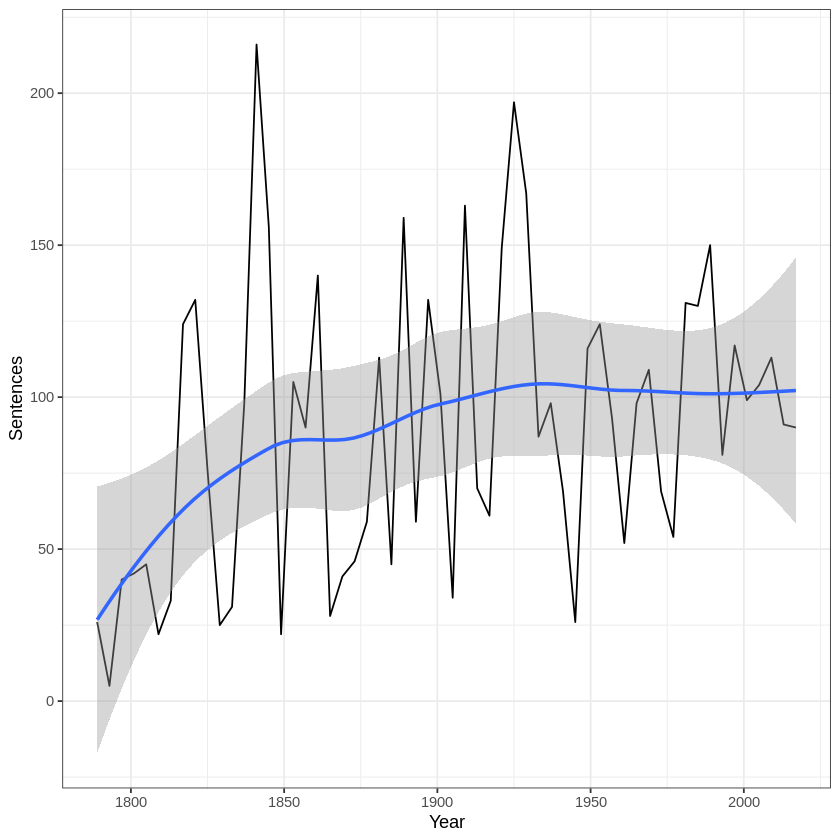

In [ ]:
# plot length of documents (in sentences) over time
annoData %>% 
  group_by(Year) %>% 
  summarize(Sentences = max(sid)) %>%
  ggplot(aes(Year, Sentences)) +
    geom_line() +
    geom_smooth() +
    theme_bw()

This is interesting and potentially useful information. Length is incredibly simple to estimate and has been used as a proxy in published research for, among other things, the [complexity of public policies like the Affordable Care Act](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2307352) and, in the case of judicial opinions, [a host of legal characteristics of interest (dicta, law clerk influence, etc.)](https://houstonlawreview.org/article/4873-an-empirical-analysis-of-the-length-of-u-s-supreme-court-opinions). Length is also often connected with readability statistics, which we will come to in later sections of the course.

That said, the real prize of the annotations are the details related to each individual token. The next three columns (`token`, `token_with_ws`, and `lemma`) all relate directly to the actual characters of the token. Take, as an example, "Citizens" (third row). The `token` is "Citizens", while the lemma is a headword for a group of related words; here, "citizen" is the lemma of "Citizens" as it is the non-plural version of the token. To get an idea of how else lemmatization changes the tokens, here's a comparison of the first 40 tokens in the dataset. 

In [ ]:
cbind(head(annoData$token,40), head(annoData$lemma,40))

[,1]            [,2]           
 [1,] Fellow          fellow         
 [2,] -               -              
 [3,] Citizens        citizen        
 [4,] of              of             
 [5,] the             the            
 [6,] Senate          Senate         
 [7,] and             and            
 [8,] of              of             
 [9,] the             the            
[10,] House           House          
[11,] of              of             
[12,] Representatives Representatives
[13,] :               :              
[14,] Among           among          
[15,] the             the            
[16,] vicissitudes    vicissitude    
[17,] incident        incident       
[18,] to              to             
[19,] life            life           
[20,] no              no             
[21,] event           event          
[22,] could           could          
[23,] have            have           
[24,] filled          fill           
[25,] me              I              
[26,] with            with           
[27,] greater         greater        
[28,] anxieties       anxiety        
[29,] than            than           
[30,] that            that           
[31,] of              of             
[32,] which           which          
[33,] the             the            
[34,] notification    notification   
[35,] was             be             
[36,] transmitted     transmit       
[37,] by              by             
[38,] your            you            
[39,] order           order          
[40,] ,               ,

Lemmatization can be particularly useful as a pre-processing step in some analyses; topic modeling immediately comes to mind. The general reason is that references to different forms of the same underlying token (say, "transmit", "transmitted", "transmits") all connote one related concept but are going to be treated as entirely distinct tokens if we were to say just look for the most frequent tokens in the corpus or in a speech. We'll come back to this later this semester when we discuss stemming and other related pre-processing considerations.



# Universal Dependencies

Now we are into the heart of the annotations. Let's highlight a chunk of the data to use as illustrations.

In [ ]:
# First tokens from Trump's speech
head(annoData[which(annoData$Year == 2017),9:15],28)

token_with_ws lemma     upos  xpos feats                           
147953 Chief         Chief     PROPN NNP  Number=Sing                     
147954 Justice       Justice   PROPN NNP  Number=Sing                     
147955 Roberts       Roberts   PROPN NNP  Number=Sing                     
147956 ,             ,         PUNCT ,    NA                              
147957 President     President PROPN NNP  Number=Sing                     
147958 Carter        Carter    PROPN NNP  Number=Sing                     
147959 ,             ,         PUNCT ,    NA                              
147960 President     President PROPN NNP  Number=Sing                     
147961 Clinton       Clinton   PROPN NNP  Number=Sing                     
147962 ,             ,         PUNCT ,    NA                              
147963 President     President PROPN NNP  Number=Sing                     
147964 Bush          Bush      PROPN NNP  Number=Sing                     
147965 ,             ,         PUNCT ,    NA                              
147966 President     President PROPN NNP  Number=Sing                     
147967 Obama         Obama     PROPN NNP  Number=Sing                     
147968 ,             ,         PUNCT ,    NA                              
147969 fellow        fellow    ADJ   JJ   Degree=Pos                      
147970 Americans     Americans PROPN NNPS Number=Plur                     
147971 ,             ,         PUNCT ,    NA                              
147972 and           and       CCONJ CC   NA                              
147973 people        people    NOUN  NNS  Number=Plur                     
147974 of            of        ADP   IN   NA                              
147975 the           the       DET   DT   Definite=Def|PronType=Art       
147976 world         world     NOUN  NN   Number=Sing                     
147977 :             :         PUNCT :    NA                              
147978 thank         thank     VERB  VBP  Mood=Ind|Tense=Pres|VerbForm=Fin
147979 you           you       PRON  PRP  Case=Acc|Person=2|PronType=Prs  
147980 .\n\n         .         PUNCT .    NA                              
       tid_source relation 
147953 2          compound 
147954 0          root     
147955 2          flat     
147956 2          punct    
147957 2          conj     
147958 5          flat     
147959 8          punct    
147960 2          conj     
147961 8          flat     
147962 11         punct    
147963 2          conj     
147964 11         flat     
147965 14         punct    
147966 2          conj     
147967 14         flat     
147968 18         punct    
147969 18         amod     
147970 2          conj     
147971 21         punct    
147972 21         cc       
147973 2          conj     
147974 24         case     
147975 24         det      
147976 21         nmod     
147977 2          punct    
147978 2          parataxis
147979 26         obj      
147980 2          punct

Next, `upos` stands for the universal part of speech tag while `xpos` stands for the treebank-specific part of speech. You can find descriptions of each `upos` classification tag [here](https://universaldependencies.org/u/pos/index.html). Knowing the parts of speech, we could --- at a really basic level --- just look to see what adjectives are most frequently used in presidential addresses overall, and in the most recent era (i.e., post 2000). 

In [ ]:
annoData %>% 
  filter(Party == "Republican") %>%
  filter(Year > 1980) %>%
  filter(upos == "NOUN") %>%
  group_by(lemma) %>% 
  summarize(count = n()) %>%
  top_n(n=10) %>%
  arrange(desc(count))

annoData %>% 
  filter(Party == "Democratic") %>%
  filter(Year > 1980) %>%
  filter(upos == "NOUN") %>%
  group_by(lemma) %>% 
  summarize(count = n()) %>%
  top_n(n=10) %>%
  arrange(desc(count))

Selecting by count



lemma      count
1  freedom    61   
2  nation     53   
3  people     51   
4  world      51   
5  time       48   
6  government 47   
7  country    36   
8  day        34   
9  citizen    33   
10 life       30

Selecting by count



lemma      count
1  world      45   
2  nation     43   
3  people     42   
4  time       37   
5  today      28   
6  century    23   
7  government 22   
8  life       21   
9  child      20   
10 generation 20

You can further distinguish parts of speech using the `feats` field, which references more specific "features" related to the parts of speech. More information on the features can be found [here](https://universaldependencies.org/u/feat/index.html). 

## Dependency Relations

Finally, the relationships *between* tokens are captured in dependency relations, which are reflected by syntactic annotations through `tid_source` and `relation`. The goal of dependency relations is to form a generalizable structure of language that works *across* languages (thus, universal dependencies). If we want to capture meaning from many different texts in different languages (with all of the different customs of those particular languages), we would first want to have some generalizable structure about how words in languages fit together.

Consider a sentence like: 

> The child chased the dog down the hall.

The underlying idea behind dependency relations is to focus primarily on content words; in the above, that would be "child", "chased", "dog", and "hall". We can start to see how knowing *just* those four words gets us a long way to understanding what might be happening; if we can add in some sort of structure (say, that "child" is the nominal subject [`nsubj`], or the do-er of the action, and "dog" is the object [`obj`], or the receiver of the action) then we can recognize that a child chased a dog (rather than the much-less-cute reverse).  

The full list of dependency relations and their abbreviations can be found [here](https://universaldependencies.org/u/dep/). 

What can we do with dependency relations? At the simplest level, they can be features that we rely on for classification. For that matter, everything we've covered in this tutorial could be a feature. We'll cover classifiers later this semester and will be able to explore this avenue a bit more then.

We could also, however, be more directly interested in using the dependency relations to study particular choices over word usage in texts. As an example, consider unique phrasings from President Obama's 2009 inauguration speech and President Trump's 2017 speech (for more on the approach here, see the `cleanNLP` documentation [here](https://statsmaths.github.io/cleanNLP/state-of-union.html). 

In [ ]:
library(magrittr)

# Trump 2017
annoData %>%
  left_join(
    annotated$token,
    c("doc_id"="doc_id", "sid"="sid", "tid"="tid_source"),
    suffix=c("", "_source")
  ) %>%
  filter(Year == 2017) %>%
  filter(relation == "obj") %>%
  select(doc_id = doc_id, start = token, word = token_source) %>%
  left_join(word_frequency, by="word") %>%
  filter(frequency < 0.005) %>%
  select(doc_id, start, word) %$%
  sprintf("%s => %s", start, word)


Attaching package: ‚Äòmagrittr‚Äô


The following object is masked from ‚Äòpackage:purrr‚Äô:

    set_names


The following object is masked from ‚Äòpackage:tidyr‚Äô:

    extract




[1] "transfer => orderly"      "schools => neighborhoods"
 [3] "mothers => trapped"       "mothers => flush"        
 [5] "industry => expense"      "industry => subsidized"  
 [7] "trillions => trillions"   "friendship => goodwill"  
 [9] "energies => tomorrow"     "blood => patriots"       
[11] "freedoms => glorious"

In [ ]:
# Obama 2009
annoData %>%
  left_join(
    annotated$token,
    c("doc_id"="doc_id", "sid"="sid", "tid"="tid_source"),
    suffix=c("", "_source")
  ) %>%
  filter(Year == 2009) %>%
  filter(relation == "obj") %>%
  select(doc_id = doc_id, start = token, word = token_source) %>%
  left_join(word_frequency, by="word") %>%
  filter(frequency < 0.005) %>%
  select(doc_id, start, word) %$%
  sprintf("%s => %s", start, word)

[1] "oath => presidential"      "consequence => greed"     
 [3] "hope => fear"              "end => grievances"        
 [5] "recriminations => dogmas"  "spirit => enduring"       
 [7] "gift => precious"          "chance => pursue"         
 [9] "measure => happiness"      "pleasures => riches"      
[11] "path => rugged"            "path => prosperity"       
[13] "possessions => worldly"    "lash => whip"             
[15] "nation => prosperous"      "interests => narrow"      
[17] "decisions => unpleasant"   "work => remaking"         
[19] "roads => bridges"          "wonders => raise"         
[21] "schools => colleges"       "schools => universities"  
[23] "scale => ambitions"        "retirement => dignified"  
[25] "trust => vital"            "charter => assure"        
[27] "charter => expanded"       "that => generations"      
[29] "generations => faced"      "generations => missiles"  
[31] "effort => cooperation"     "peace => earned"          
[33] "terror => slaughtering"    "swill => bitter"          
[35] "bodies => starved"         "bodies => minds"          
[37] "plenty => relative"        "indifference => suffering"
[39] "road => unfolds"           "faith => ultimately"      
[41] "faith => determination"    "job => sees"              
[43] "stairway => filled"        "child => decides"         
[45] "work => honesty"           "work => courage"          
[47] "work => tolerance"         "work => curiosity"        
[49] "work => loyalty"           "work => patriotism"       
[51] "destiny => uncertain"      "oath => sacred"           
[53] "words => timeless"         "currents => icy"          
[55] "end => journey"

# Utility packages

These are  packages that provide supporting functionality and more specialized options for things like tokenization.



## SnowballC / Rstem

Official description of **SnowballC**: 

> An R interface to the C 'libstemmer' library that implements Porter's word stemming algorithm for collapsing words to a common root to aid comparison of vocabulary. Currently supported languages are Danish, Dutch, English, Finnish, French, German, Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian, Spanish, Swedish and Turkish.

SnowballC is called by the stemming functions of several of the general packages discussed above.

The package **Rstem** appears to do the same thing. 



## stopwords

Official description: 

> R package providing ‚Äúone-stop shopping‚Äù (or should that be ‚Äúone-shop stopping‚Äù?) for stopword lists in R, for multiple languages and sources. No longer should text analysis or NLP packages bake in their own stopword lists or functions, since this package can accommodate them all, and is easily extended.

*stopwords* is part of the quanteda ecosystem. It wraps stopword lists from multiple sources. To access, specify a source and a language:

In [ ]:
head(stopwords::stopwords("de", source = "snowball"), 20)
head(stopwords::stopwords("ja", source = "marimo"), 20)

[1] "aber"    "alle"    "allem"   "allen"   "aller"   "alles"   "als"    
 [8] "also"    "am"      "an"      "ander"   "andere"  "anderem" "anderen"
[15] "anderer" "anderes" "anderm"  "andern"  "anderr"  "anders"

[1] "ÁßÅ"       "ÂÉï"       "Ëá™ÂàÜ"     "Ëá™Ë∫´"     "Êàë„ÄÖ"     "ÁßÅÈÅî"    
 [7] "„ÅÇ„Å™„Åü"   "ÂΩº"       "ÂΩºÂ•≥"     "ÂΩº„Çâ"     "ÂΩºÂ•≥„Çâ"   "„ÅÇ„Çå"    
[13] "„Åù„Çå"     "„Åì„Çå"     "„ÅÇ„Çå„Çâ"   "„ÅÇ„Çå„Çâ„ÅÆ" "„Åù„Çå„Çâ"   "„Åù„Çå„Çâ„ÅÆ"
[19] "„Åì„Çå„Çâ"   "„Åì„Çå„Çâ„ÅÆ"

The sources can be accessed with `stopwords_getsources`:

In [ ]:
# list all sources
stopwords::stopwords_getsources()

[1] "snowball"      "stopwords-iso" "misc"          "smart"        
[5] "marimo"        "ancient"       "nltk"          "perseus"

The languages for each source can be accessed via `stopwords_getlanguages`:

In [ ]:
stopwords::stopwords_getlanguages("snowball")

[1] "da" "de" "en" "es" "fi" "fr" "hu" "ir" "it" "nl" "no" "pt" "ro" "ru" "sv"

A full list is maintained on the project's github: https://github.com/quanteda/stopwords.

## tokenizers

Examples from the tokenizers documentation:

In [ ]:
james <- paste0(
  "The question thus becomes a verbal one\n",
  "again; and our knowledge of all these early stages of thought and feeling\n",
  "is in any case so conjectural and imperfect that farther discussion would\n",
  "not be worth while.\n",
  "\n",
  "Religion, therefore, as I now ask you arbitrarily to take it, shall mean\n",
  "for us _the feelings, acts, and experiences of individual men in their\n",
  "solitude, so far as they apprehend themselves to stand in relation to\n",
  "whatever they may consider the divine_. Since the relation may be either\n",
  "moral, physical, or ritual, it is evident that out of religion in the\n",
  "sense in which we take it, theologies, philosophies, and ecclesiastical\n",
  "organizations may secondarily grow.\n"
)

Tokenize into characters:

In [ ]:
tokenizers::tokenize_characters(james)[[1]] %>% head(20)


[1] "t" "h" "e" "q" "u" "e" "s" "t" "i" "o" "n" "t" "h" "u" "s" "b" "e" "c" "o"
[20] "m"

Tokenize into character shingles:

In [ ]:
tokenizers::tokenize_character_shingles(james)[[1]] %>% head(20)

[1] "the" "heq" "equ" "que" "ues" "est" "sti" "tio" "ion" "ont" "nth" "thu"
[13] "hus" "usb" "sbe" "bec" "eco" "com" "ome" "mes"

Tokenize into words:

In [ ]:
tokenizers::tokenize_words(james)[[1]] %>% head(20)

[1] "the"       "question"  "thus"      "becomes"   "a"         "verbal"   
 [7] "one"       "again"     "and"       "our"       "knowledge" "of"       
[13] "all"       "these"     "early"     "stages"    "of"        "thought"  
[19] "and"       "feeling"

Tokenize into word stems:


In [ ]:
tokenizers::tokenize_word_stems(james)[[1]] %>% head(20)

[1] "the"      "question" "thus"     "becom"    "a"        "verbal"  
 [7] "one"      "again"    "and"      "our"      "knowledg" "of"      
[13] "all"      "these"    "earli"    "stage"    "of"       "thought" 
[19] "and"      "feel"

Tokenize into words omitting stopwords:

In [ ]:
tokenizers::tokenize_words(james, stopwords = stopwords::stopwords("en"))[[1]] %>% head(20)

[1] "question"    "thus"        "becomes"     "verbal"      "one"        
 [6] "knowledge"   "early"       "stages"      "thought"     "feeling"    
[11] "case"        "conjectural" "imperfect"   "farther"     "discussion" 
[16] "worth"       "religion"    "therefore"   "now"         "ask"

Tokenize into words (and punctuation) using the Penn Tree Bank tokenizer instead:

In [ ]:
tokenizers::tokenize_ptb(james)[[1]] %>% head(20)

[1] "The"       "question"  "thus"      "becomes"   "a"         "verbal"   
 [7] "one"       "again"     ";"         "and"       "our"       "knowledge"
[13] "of"        "all"       "these"     "early"     "stages"    "of"       
[19] "thought"   "and"

Tokenize into ngrams:

In [ ]:
tokenizers::tokenize_ngrams(james, n = 5, n_min = 2)[[1]] %>% head(20)

[1] "the question"                   "the question thus"             
 [3] "the question thus becomes"      "the question thus becomes a"   
 [5] "question thus"                  "question thus becomes"         
 [7] "question thus becomes a"        "question thus becomes a verbal"
 [9] "thus becomes"                   "thus becomes a"                
[11] "thus becomes a verbal"          "thus becomes a verbal one"     
[13] "becomes a"                      "becomes a verbal"              
[15] "becomes a verbal one"           "becomes a verbal one again"    
[17] "a verbal"                       "a verbal one"                  
[19] "a verbal one again"             "a verbal one again and"

Tokenize into skipgrams:

In [ ]:
tokenizers::tokenize_skip_ngrams(james, n = 5, n_min = 2,k=2)[[1]] %>% head(20)

[1] "the question"                "the thus"                   
 [3] "the becomes"                 "the question thus"          
 [5] "the question becomes"        "the question a"             
 [7] "the thus becomes"            "the thus a"                 
 [9] "the thus verbal"             "the becomes a"              
[11] "the becomes verbal"          "the becomes one"            
[13] "the question thus becomes"   "the question thus a"        
[15] "the question thus verbal"    "the question becomes a"     
[17] "the question becomes verbal" "the question becomes one"   
[19] "the question a verbal"       "the question a one"

There is a special tweet tokenizer, treating usernames and hashtags differently:

In [ ]:
tokenize_tweets("Welcome, @user, to the tokenizers package. #rstats #forever")

[[1]]
[1] "welcome"    "@user"      "to"         "the"        "tokenizers"
[6] "package"    "#rstats"    "#forever"

"Tokenize" into sentences:

In [ ]:
tokenizers::tokenize_sentences(james)

[[1]]
[1] "The question thus becomes a verbal one again; and our knowledge of all these early stages of thought and feeling is in any case so conjectural and imperfect that farther discussion would not be worth while."                                               
[2] "Religion, therefore, as I now ask you arbitrarily to take it, shall mean for us _the feelings, acts, and experiences of individual men in their solitude, so far as they apprehend themselves to stand in relation to whatever they may consider the divine_."
[3] "Since the relation may be either moral, physical, or ritual, it is evident that out of religion in the sense in which we take it, theologies, philosophies, and ecclesiastical organizations may secondarily grow."

"Tokenize" into paragraphs:

In [ ]:
tokenizers::tokenize_paragraphs(james)

[[1]]
[1] "The question thus becomes a verbal one again; and our knowledge of all these early stages of thought and feeling is in any case so conjectural and imperfect that farther discussion would not be worth while."                                                                                                                                                                                                                                                                   
[2] "Religion, therefore, as I now ask you arbitrarily to take it, shall mean for us _the feelings, acts, and experiences of individual men in their solitude, so far as they apprehend themselves to stand in relation to whatever they may consider the divine_. Since the relation may be either moral, physical, or ritual, it is evident that out of religion in the sense in which we take it, theologies, philosophies, and ecclesiastical organizations may secondarily grow. "

## tokenizers.bpe

Does Byte-Pair Encoding tokenization (syllables/wordpieces) using "YouTokenToMe".

## sentencepiece

Another Byte Pair Encoding algorithm




## NLP

Official description: "Basic classes and methods for Natural Language Processing." Provides some of the underlying infrastructure for udpipe, openNLP, and cleanNLP. The use of the String, Annotator, Annotations, Span classes is shown in the openNLP discussion above.




## tif - Text Interchange Format

Official description: 

> This package describes and validates formats for storing common object arising in text analysis as native R objects. Representations of a text corpus, document term matrix, and tokenized text are included. The tokenized text format is extensible to include other annotations. There are two versions of the corpus and tokens objects; packages should accept both and return or coerce to at least one of these.

Lincoln Mullen describes tif, which he adopted in the tokenizers package:

> The Text Interchange Formats are a set of standards defined at an rOpenSci sponsored meeting in London in 2017. The formats allow R text analysis packages to target defined inputs and outputs for corpora, tokens, and document-term matrices. By adhering to these recommendations, R packages can buy into an interoperable ecosystem.

See https://github.com/ropensci/tif 

## Others

### nametagger

NER with Markov models

### torch.ner

NER with torch.

### crfsuite

NER with conditional random fields.

### hunspell

Spell-checking

### wordnet

Access to WordNet (https://wordnet.princeton.edu/)

### tau

Provides encoding utilities


